In [3]:
import random
import os
import matplotlib.pyplot as plt
import cv2
from deap import base, creator, tools, algorithms
from shapely.geometry import Polygon
from shapely.affinity import translate, rotate
from shapely import affinity

In [4]:
# ============================================================
# FUNCIÓN DE CARGA DE MOLDES
# ============================================================
def cargar_moldes_desde_png(path_png, threshold=180, simplify_tol=1.0, scale_factor=1.0):
    img = cv2.imread(path_png, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"No se pudo cargar la imagen: {path_png}")

    _, mask = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    piezas = []
    for cnt in contours:
        if len(cnt) < 3:
            continue
        if cv2.contourArea(cnt) < 20:
            continue

        coords = [tuple(pt[0]) for pt in cnt]
        poly = Polygon(coords)
        if not poly.is_valid:
            poly = poly.buffer(0)
        poly = poly.simplify(simplify_tol, preserve_topology=True)
        poly = affinity.scale(poly, xfact=scale_factor, yfact=scale_factor, origin=(0, 0))

        if poly.area > 10:
            piezas.append(poly)

    print(f"✅ {os.path.basename(path_png)} → {len(piezas)} moldes válidos.")
    return piezas

✅ calzoncillo-G.png → 5 moldes válidos.
✅ calzoncillo-M.png → 5 moldes válidos.
✅ calzoncillo-P.png → 5 moldes válidos.

🔹 Optimizando CALZONCILLO (15 moldes en total)

gen	nevals	avg    	min    
0  	50    	165.008	120.371
1  	34    	146.49 	107.778
2  	42    	140.423	104.815
3  	44    	127.082	91.482 
4  	36    	121.771	91.482 
5  	38    	115.867	92.9635
6  	41    	114.593	92.9635
7  	39    	111.46 	87.4079
8  	42    	105.704	83.7041
9  	39    	102.252	83.7041
10 	32    	101.334	83.7041
11 	35    	98.8894	83.7041
12 	43    	102.852	82.593 
13 	42    	101.038	83.7041
14 	42    	101.46 	83.7041
15 	42    	99.6376	83.7041
16 	39    	99.8746	83.7041
17 	35    	99.1338	83.7041
18 	38    	101.734	83.7041
19 	42    	102.23 	83.7041
20 	35    	101.349	83.7041
21 	37    	98.5857	83.7041
22 	41    	96.1561	83.7041
23 	40    	97.519 	83.7041
24 	42    	97.4524	82.2226
25 	36    	96.9412	82.2226
26 	39    	101.897	82.2226
27 	42    	98.8005	83.7041
28 	39    	99.9931	83.7041
29 	42    	94.882 	83

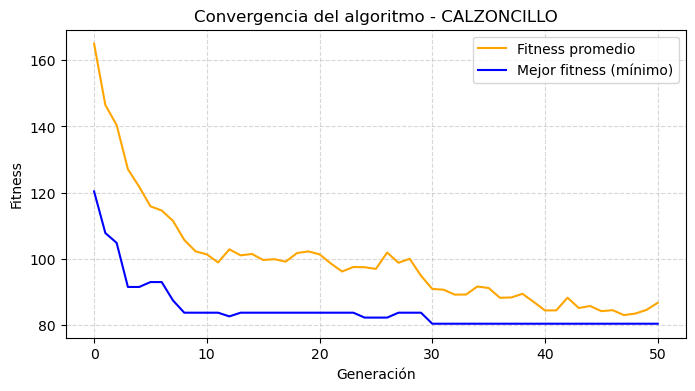

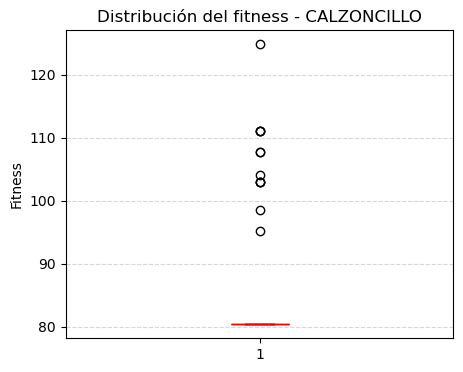

✅ camisa-M.png → 20 moldes válidos.

🔹 Optimizando CAMISA (20 moldes en total)

gen	nevals	avg    	min    
0  	50    	313.164	241.852
1  	39    	286.178	221.112
2  	41    	275.03 	215.186
3  	43    	262.63 	187.778
4  	41    	254.512	187.778
5  	42    	246.704	187.778
6  	43    	237.03 	187.778
7  	36    	235.875	187.778
8  	42    	246.838	180    
9  	47    	243.593	176.297
10 	39    	237.237	185.186
11 	36    	223.252	183.334
12 	37    	215.326	183.704
13 	29    	209.186	183.704
14 	46    	212.378	176.297
15 	35    	203.474	176.297
16 	39    	205.519	176.297
17 	45    	204.415	176.297
18 	39    	194.445	176.297
19 	39    	187.519	176.297
20 	48    	186.215	176.297
21 	35    	186.704	176.297
22 	41    	179.104	176.297
23 	39    	184.274	176.297
24 	37    	180.497	176.297
25 	39    	185.015	176.297
26 	41    	184.348	176.297
27 	44    	187.541	176.297
28 	46    	185.074	176.297
29 	40    	185.941	176.297
30 	42    	179.482	176.297
31 	42    	183.541	176.297
32 	40    	187.437	176.297
33

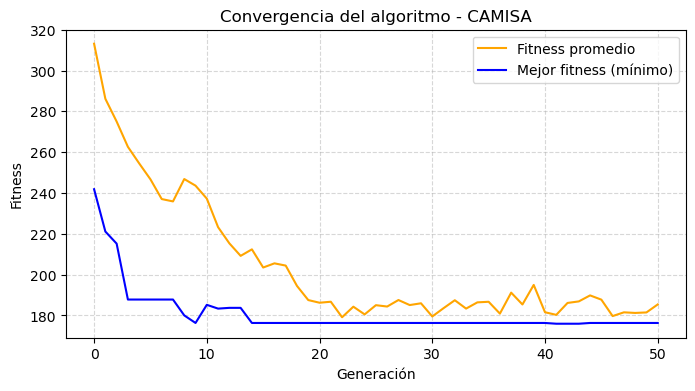

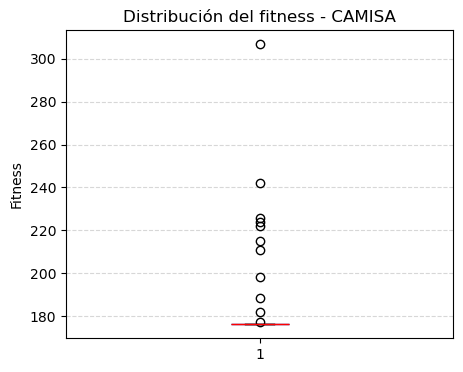

✅ remera-G.png → 4 moldes válidos.
✅ remera-M.png → 4 moldes válidos.
✅ remera-P.png → 4 moldes válidos.

🔹 Optimizando REMERA (12 moldes en total)

gen	nevals	avg    	min    
0  	50    	482.519	375.926
1  	44    	432.638	339.26 
2  	37    	402.675	329.63 
3  	46    	393.326	328.519
4  	43    	396.66 	328.519
5  	37    	387.304	328.519
6  	45    	387.793	328.519
7  	36    	375.252	328.519
8  	36    	373.126	307.778
9  	38    	363.904	304.445
10 	39    	352.711	307.778
11 	38    	354.356	318.889
12 	39    	350.356	318.889
13 	36    	343.556	309.63 
14 	40    	339.252	298.519
15 	41    	343.911	293.334
16 	39    	342.208	298.889
17 	37    	334.46 	298.889
18 	37    	322.46 	295.926
19 	35    	314.534	295.926
20 	34    	316.519	295.926
21 	39    	317.911	295.926
22 	44    	313.511	295.926
23 	40    	322.948	295.926
24 	36    	326.297	295.926
25 	45    	341.23 	295.926
26 	35    	332    	295.926
27 	41    	329.267	295.926
28 	46    	333.704	295.926
29 	36    	318.148	295.926
30 	41    	321

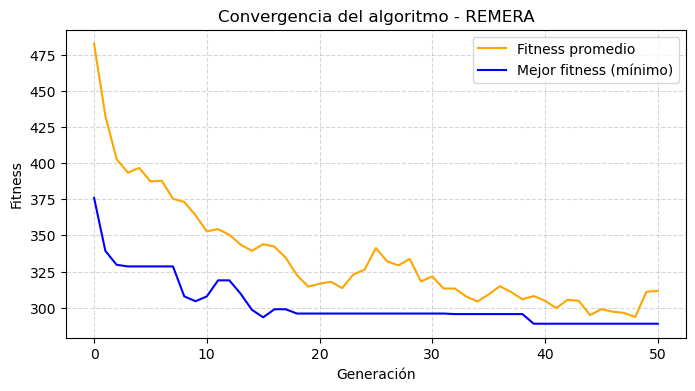

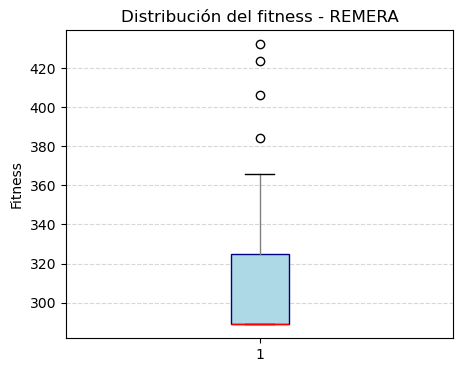


🏁 Layout final generado (ancho total = 551.19 cm)


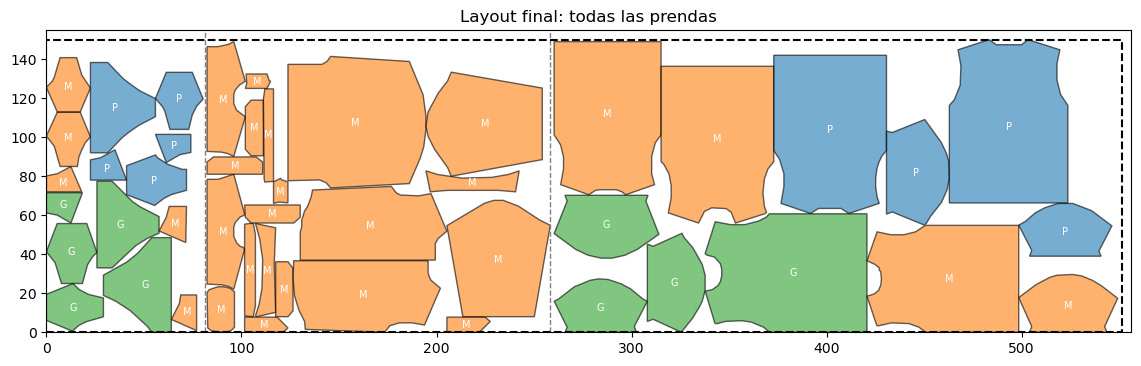

In [23]:
# ------------------------------
# Parámetros del problema
# ------------------------------
STRIP_HEIGHT = 150  # alto fijo del rollo
ANGLES = [0, 90, 180, 270]
SCALE_FACTOR = 160 / 432

# ------------------------------
# Creación global de creator (una sola vez)
# ------------------------------
if "FitnessMin" not in creator.__dict__:
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
if "Individual" not in creator.__dict__:
    creator.create("Individual", list, fitness=creator.FitnessMin)

# ------------------------------
# Placement horizontal
# ------------------------------
def place_piece(y, idx, phi, placed, PIECES, strip_height=STRIP_HEIGHT):
    poly = PIECES[idx]
    poly_rot = rotate(poly, phi, origin=(0,0), use_radians=False)

    minx, miny, maxx, maxy = poly_rot.bounds
    w = maxx - minx
    h = maxy - miny

    # clamp en y
    y = min(max(0, y), strip_height - h)

    # calcular x_base: máximo borde derecho de piezas que solapan en Y
    x_base = 0
    for other in placed:
        ox1, oy1, ox2, oy2 = other.bounds
        if not (y + h <= oy1 or y >= oy2):  # hay solape en Y
            x_base = max(x_base, ox2)

    # trasladar polígono a (x_base, y)
    poly_pos = translate(poly_rot, xoff=x_base - minx, yoff=y - miny)

    # slide down
    while True:
        new_poly = translate(poly_pos, yoff=-1)
        if new_poly.bounds[1] < 0 or any(new_poly.overlaps(r) for r in placed):
            break
        poly_pos = new_poly

    return poly_pos


def place_pieces(individual, PIECES):
    placed = []
    max_x = 0
    for (y, idx, phi) in individual:
        poly = place_piece(y, idx, phi, placed, PIECES, strip_height=STRIP_HEIGHT)
        placed.append(poly)
        max_x = max(max_x, poly.bounds[2])  # borde derecho más alejado
    return max_x, placed


# ------------------------------
# Fitness
# ------------------------------
def evaluate(individual, PIECES):
    used_width, placed = place_pieces(individual, PIECES)
    total_area = sum(p.area for p in PIECES)
    strip_area = used_width * STRIP_HEIGHT if used_width > 0 else 1.0
    efficiency_loss = 1.0 - (total_area / strip_area)
    return (used_width + 0.001 * efficiency_loss,)  # minimizar ancho usado

MARGIN_BETWEEN = 1  # cm entre prendas

# ------------------------------
# Visualización
# ------------------------------
def plot_layout(polygons, names, strip_height, used_width, title="Layout Horizontal"):
    fig, ax = plt.subplots(figsize=(14, 5))
    color_map = {
        "S": "#17becf",
        "P": "#1f77b4",
        "M": "#ff7f0e",
        "G": "#2ca02c",
        "XG": "#9467bd",
        "GG": "#d62728"
    }

    def color_por_talle(nombre):
        for k in sorted(color_map.keys(), key=len, reverse=True):
            if f"-{k}" in nombre:
                return color_map[k]
        return "#999999"

    # 🔹 Dibujar las piezas (mantener esto igual)
    for idx, (poly, name) in enumerate(zip(polygons, names)):
        if not poly.is_empty:
            color = color_por_talle(name)
            x, y = poly.exterior.xy
            ax.fill(x, y, alpha=0.6, fc=color, edgecolor="k")
            cx, cy = poly.centroid.x, poly.centroid.y
            ax.text(cx, cy, name.split('-')[1].split('.')[0], ha="center", va="center", fontsize=7, color="white")

    # 🔹 Agregar líneas divisorias (acá es el lugar correcto)
    acc = 0
    for w in PRENDA_WIDTHS[:-1]:  # lista global de anchos por prenda
        acc += w + MARGIN_BETWEEN
        ax.axvline(x=acc, color="gray", linestyle="--", linewidth=1)

    # 🔹 Dibujar borde del rollo
    ax.plot([0, used_width, used_width, 0, 0],
            [0, 0, strip_height, strip_height, 0], "k--")

    ax.set_xlim(0, used_width + 5)
    ax.set_ylim(0, strip_height + 5)
    ax.set_aspect("equal")
    ax.set_title(title)
    plt.show()



# ============================================================
# LOOP GLOBAL — TODAS LAS PRENDAS EN UNA TELA
# ============================================================
RUTA_DATASET = "moldes"
PLACED_ALL = []
NAMES_ALL = []
PRENDA_WIDTHS = []
X_OFFSET = 0
TOTAL_WIDTH = 0

def plot_convergence(prenda, log):
    gen = log.select("gen")
    avg = log.select("avg")
    min_ = log.select("min")

    plt.figure(figsize=(8, 4))
    plt.plot(gen, avg, label="Fitness promedio", color="orange")
    plt.plot(gen, min_, label="Mejor fitness (mínimo)", color="blue")
    plt.xlabel("Generación")
    plt.ylabel("Fitness")
    plt.title(f"Convergencia del algoritmo - {prenda.upper()}")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

def plot_boxplot(prenda, pop):
    fitness_vals = [ind.fitness.values[0] for ind in pop]

    plt.figure(figsize=(5, 4))
    plt.boxplot(fitness_vals, patch_artist=True,
                boxprops=dict(facecolor="lightblue", color="navy"),
                medianprops=dict(color="red"),
                whiskerprops=dict(color="gray"))
    plt.title(f"Distribución del fitness - {prenda.upper()}")
    plt.ylabel("Fitness")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

for prenda in ["calzoncillo", "camisa", "remera"]:
    carpeta = os.path.join(RUTA_DATASET, prenda)
    archivos = [os.path.join(carpeta, f) for f in os.listdir(carpeta) if f.lower().endswith(".png")]

    PIECES, NAMES = [], []
    for path in archivos:
        piezas = cargar_moldes_desde_png(path, scale_factor=SCALE_FACTOR)  # asumimos que ya tenés esta función definida
        PIECES.extend(piezas)
        NAMES.extend([os.path.basename(path)] * len(piezas))

    N = len(PIECES)
    print(f"\n🔹 Optimizando {prenda.upper()} ({N} moldes en total)\n")

    toolbox = base.Toolbox()

    def init_individual():
        indices = random.sample(range(N), N)
        ind = []
        for i in indices:
            minx, miny, maxx, maxy = PIECES[i].bounds
            h = maxy - miny
            y = random.randint(0, int(STRIP_HEIGHT - h))
            phi = random.choice(ANGLES)
            ind.append((y, i, phi))
        return creator.Individual(ind)

    toolbox.register("individual", init_individual)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def cx_pmx_tuples(ind1, ind2):
        idx1 = [gene[1] for gene in ind1]
        idx2 = [gene[1] for gene in ind2]
        tools.cxPartialyMatched(idx1, idx2)
        child1, child2 = [], []
        for new_idx, tpl1, tpl2 in zip(idx1, ind1, ind2):
            if random.random() < 0.5:
                y, _, phi = tpl1
            else:
                y, _, phi = tpl2
            child1.append((y, new_idx, phi))
        for new_idx, tpl1, tpl2 in zip(idx2, ind1, ind2):
            if random.random() < 0.5:
                y, _, phi = tpl1
            else:
                y, _, phi = tpl2
            child2.append((y, new_idx, phi))
        ind1[:], ind2[:] = child1, child2
        return ind1, ind2

    def mut_tuples(ind):
        if random.random() < 0.3:
            i, j = random.sample(range(len(ind)), 2)
            ind[i], ind[j] = ind[j], ind[i]
        else:
            k = random.randrange(len(ind))
            y, i, phi = ind[k]
            if random.random() < 0.5:
                minx, miny, maxx, maxy = PIECES[i].bounds
                h = maxy - miny
                y = random.randint(0, STRIP_HEIGHT - int(h))
            else:
                phi = random.choice(ANGLES)
            ind[k] = (y, i, phi)
        return (ind,)

    toolbox.register("mate", cx_pmx_tuples)
    toolbox.register("mutate", mut_tuples)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evaluate, PIECES=PIECES)

    # Ejecutar GA
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", lambda x: sum(f[0] for f in x) / len(x))
    stats.register("min", lambda x: min(f[0] for f in x))

    pop, log = algorithms.eaSimple(pop, toolbox,
                                   cxpb=0.7, mutpb=0.3,
                                   ngen=50,
                                   stats=stats, halloffame=hof,
                                   verbose=True)

    best = hof[0]
    used_width, placed = place_pieces(best, PIECES)

    # ============================
    # Gráfico de convergencia
    # ============================

    plot_convergence(prenda, log)

    # ============================
    # Diagrama de cajas (última generación)
    # ============================
    plot_boxplot(prenda, pop)

    # Mover toda la prenda a la derecha del área ya ocupada
    placed_shifted = [affinity.translate(p, xoff=X_OFFSET, yoff=0) for p in placed]
    PLACED_ALL.extend(placed_shifted)
    NAMES_ALL.extend(NAMES)

    PRENDA_WIDTHS.append(used_width)

    X_OFFSET += used_width + MARGIN_BETWEEN + 1
    TOTAL_WIDTH = X_OFFSET

print(f"\n🏁 Layout final generado (ancho total = {TOTAL_WIDTH:.2f} cm)")
plot_layout(PLACED_ALL, NAMES_ALL, STRIP_HEIGHT, TOTAL_WIDTH, title="Layout final: todas las prendas")
